In [55]:
#library
import pandas as pd
import numpy as np
from IPython.display import Image

###
###
###

## Task 1. Working with data


In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\movie_metadata.csv")
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,0.0$,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,0.0$,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0$,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0$,2012.0,719.0,6.3,2.35,660


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
## 1.2. The duration column contains data on the film length. How many missing values are there in this column? 

null_duration = df["duration"].isnull().sum()
print("missing value count in duration =",null_duration)


missing value count in duration = 15


In [5]:
## 1.3. Replace the missing values in the duration column with the median value for this column. 

## create filter for median
median = df["duration"].median()
df["duration"].fillna(median, inplace=True)

## Check if the missing value still there or no
null_duration1 = df["duration"].isnull().sum()
null_duration1

0

In [6]:
## 1.4. What is the average film length? Give the answer as a floating-point figure rounded to two decimal places. 

average_duration = df["duration"].mean()
print("the average film lenght is ",round(average_duration,2)," minutes")

the average film lenght is  107.19  minutes


In [7]:
## 1.5. Create a movie_duration_category column, which will contain three categories depending on the film length:
## • Category "1. <90" if the film is less than 90 minutes long
## • Category "2. 90–120" if the film is between 90 minutes and two hours long (inclusively)
## • Category "3. >120" if the film is more than two hours long 

bins = [0,90, 120, float('inf')]
labels = [ "1. <90", "2. 90–120" , "3. >120"] 
df["movie_duration_category"] = pd.cut(df["duration"], bins = bins, labels = labels)
df[["duration", "movie_duration_category"]]

,duration,movie_duration_category
0,178.0,3. >120
1,169.0,3. >120
2,148.0,3. >120
3,164.0,3. >120
4,103.0,2. 90–120
...,...,...
5038,87.0,1. <90
5039,43.0,1. <90
5040,76.0,1. <90
5041,100.0,2. 90–120


In [8]:
## 1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of films:
## • Table rows: year
## • Table columns: movie duration category ("<90", "90–120", ">120")
## • The year of release should be displayed in the YYYY format. 

filtered = df[df["title_year"]>2000]
filtered["title_year"].count()

## make sure the column is filtered
df["title_year"].count()

## crate the summary table
summary = pd.pivot_table(filtered, index='title_year', columns='movie_duration_category', aggfunc='size', fill_value=0)

summary

movie_duration_category,1. <90,2. 90–120,3. >120
title_year,,,
2001.0,36,113,39
2002.0,40,142,27
2003.0,37,102,30
2004.0,38,134,42
2005.0,40,133,48
2006.0,50,136,53
2007.0,37,124,43
2008.0,42,147,36
2009.0,55,165,40


In [9]:
## 1.7. How many films between 90 minutes and two hours long were released in 2008?

answer = filtered[(filtered["title_year"]==2008)& (filtered['movie_duration_category']=="2. 90–120")]
print("films between 90 minutes and two hours long were released in 2008 is ",answer["color"].count(),"films" )

films between 90 minutes and two hours long were released in 2008 is  147 films


In [10]:
## 1.8. The plot_keywords column holds keywords characterizing the film's plot. Using the data 
##      in this column, create a column called movie_plot_category, to contain four categories
##      depending on the key words in the column:
##      • Category "love_and_death" if the keywords include both "love" and "death"
##      • Category "love" if the keywords include the word "love"
##      • Category "death" if the keywords include the word "death"
##      • Category "other" if the keywords do not meet the conditions above 


## define the category
def cat(i):
    ## eliminate the null value
    if pd.isna(i):
        return "Other"

    ## create the category
    else:
        keyword_list = i.lower().split('|')
        if "love" in keyword_list and "death" in keyword_list:
            return "love_and_death"
        elif "love" in keyword_list:
            return "love"
        elif "death" in keyword_list:
            return "death"
        else:
            return "Other"

## applying the formulas on column
df['movie_plot_category'] = df['plot_keywords'].apply(lambda x: cat(x))

## checking the column
df['movie_plot_category'].value_counts()

Other             4722
love               189
death              123
love_and_death       9
Name: movie_plot_category, dtype: int64

In [11]:
## physical check on the column
df[['movie_plot_category','plot_keywords']]

,movie_plot_category,plot_keywords
0,Other,avatar|future|marine|native|paraplegic
1,Other,goddess|marriage ceremony|marriage proposal|pi...
2,Other,bomb|espionage|sequel|spy|terrorist
3,Other,deception|imprisonment|lawlessness|police offi...
4,Other,NaN
...,...,...
5038,Other,fraud|postal worker|prison|theft|trial
5039,Other,cult|fbi|hideout|prison escape|serial killer
5040,Other,NaN
5041,Other,NaN


In [12]:
## 1.9. The imdb_score column shows a viewer rating for the film. Build a table to reflect the
##      average rating of films depending on which movie_plot_category category they belong to. 

# Create the pivot table with mean values
rating = df.pivot_table(index='movie_plot_category', values='imdb_score', aggfunc='mean')
# Sort the table to analyse easier
sorted_rating = rating.sort_values(by='imdb_score',ascending=False)
sorted_rating

,imdb_score
movie_plot_category,
love_and_death,6.677778
love,6.533862
death,6.508130
Other,6.436298


In [13]:
## 1.10. What is the average rating of films in the "love" category? Give the answer as a floatingpoint
## figure rounded to two decimal places. 

anu = rating.loc['love', "imdb_score"]
print("the average rating of films in the love category is ", round(anu,2))

the average rating of films in the love category is  6.53


In [14]:
## 1.11. The budget column contains the film's budget. What is the median budget for all the films
##       listed? Give the answer as an integer.

df['budget'] = df['budget'].str.replace('$', '').str.replace(',', '').astype(float)
med = df['budget'].median()
print("median budget for all films listed is ",int(med))

median budget for all films listed is  15000000


C:\Users\user\AppData\Local\Temp\ipykernel_2088\4226816954.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['budget'] = df['budget'].str.replace('$', '').str.replace(',', '').astype(float)


###
###
###

### Task 2. Problem-solving


In [15]:
## read the data

df1 = pd.read_csv("C:\\Users\\user\\Downloads\\event_data.csv")
df1

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN
...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN
79738,a84999,2019-09-01 23:57:50,simple_event,NaN
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79742 entries, 0 to 79741
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          79742 non-null  object 
 1   event_date       79742 non-null  object 
 2   event_type       79742 non-null  object 
 3   purchase_amount  6207 non-null   float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [17]:
## 2. Highlight user cohorts based on the week of registration in the application. The cohort
##    identifier should be the week ordinal (for example, the week from July 29 to August 4
##    should have identifier 31).

# Convert the 'registration_date' column to datetime if needed
df1['event_date'] = pd.to_datetime(df1['event_date'])

# Extract the week ordinal identifier and assign it to a new column
df1['event_week'] = df1['event_date'].dt.isocalendar().week
user = pd.pivot_table(df1, columns='event_week' , aggfunc = 'size')
user

event_week
31     5758
32    13145
33    18144
34    20711
35    21984
dtype: int64

In [18]:
## 3. How many unique users in the cohort with ID 33?

# filter the user with 33 id
filterlah = df1[df1['user_id'].str.contains('33')]

# filter for unique user
unique_users = filterlah['user_id'].nunique()

# print the result
print("unique users in the cohort with ID 33 is ",unique_users)

unique users in the cohort with ID 33 is  176


In [37]:
## 4. For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The
##    lifetime indicator is calculated based on the serial number of the week in which the event
##    is committed, relative to the week of registration. For example, an event committed on
##    August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero
##    week of lifetime, and an event committed by the same user on August 5 will be committed
##    on the first week of lifetime).

## Calculate the lifetime
df1['week_lifetime'] = df1['event_week'] - df1['event_week'].min()

## Calculate the week of the event relative to the week of registration
lifetime = df1[df1['event_type'].str.contains('registration')]

## show the table
lifetime

,user_id,event_date,event_type,purchase_amount,event_week,week_lifetime
0,c40e6a,2019-07-29 00:02:15,registration,NaN,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,31,0
...,...,...,...,...,...,...
79697,a7c20c,2019-09-01 23:36:39,registration,NaN,35,4
79703,03e836,2019-09-01 23:38:18,registration,NaN,35,4
79710,fb0e00,2019-09-01 23:41:25,registration,NaN,35,4
79712,46b4f8,2019-09-01 23:41:57,registration,NaN,35,4


In [38]:
## 5. Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

## create basic pivot table
retention_table = lifetime.pivot_table(index='week_lifetime',values='user_id', aggfunc='nunique')

## add retention rate
retention_table['retention_rate'] = round(((retention_table['user_id']/retention_table['user_id'].shift())*100),2)

## show the summary table
retention_table

,user_id,retention_rate
week_lifetime,,
0,1975,NaN
1,1952,98.84
2,2045,104.76
3,1974,96.53
4,2050,103.85


In [39]:
## 6. What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent,
## rounded to 2 decimal places, inclusive

## create filter for user with id 33
ah = lifetime[lifetime['user_id'].str.contains('32') ]

## create basic pivot table
tab = ah.pivot_table(index='week_lifetime',values='user_id', aggfunc='nunique')


## create retention rate column
tab['retention_rate'] = round(((tab['user_id']/tab['user_id'].shift())*100),2)

## print the result
print('retention rate for a cohort with ID 32 in week 3 is ',tab.iloc[3,1],'%')

retention rate for a cohort with ID 32 in week 3 is  128.57 %


In [40]:
## 7. Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying
##    User) for cohorts depending on lifetime.

## filtering purchase event
duit = df1[df1['event_type'].str.contains('purchase')]

## create basic pivot table
baru = duit.pivot_table(index='week_lifetime',values='user_id', aggfunc='nunique')

## add sum of purchase amount
baru['purchase_amount'] = duit['purchase_amount'].sum()

## add ARPPU
baru['arpu'] = baru['purchase_amount'] / baru['user_id']

## summary table
baru

,user_id,purchase_amount,arpu
week_lifetime,,,
0,292,186430.0,638.458904
1,909,186430.0,205.093509
2,1236,186430.0,150.833333
3,1429,186430.0,130.461861
4,1531,186430.0,121.770085


In [41]:
## 8. What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point
##    number, rounded to 2 decimal places, inclusive.

## filter the user with id 31
id31 = duit[duit['user_id'].str.contains('31') ]

## create basic pivot table
pv31 = id31.pivot_table(index = 'week_lifetime' , values = 'user_id' , aggfunc='nunique')

## add sum of purchase amount
pv31['purchase_amount'] = id31['purchase_amount'].sum()

## add arppu
pv31['arpu'] = pv31['purchase_amount'] / pv31['user_id']

## print the result
print('the 3-week ARRPU of cohort with id 31 is $',round(pv31.loc[3, 'arpu'],2))

the 3-week ARRPU of cohort with id 31 is $ 139.73


In [42]:
## 9. What is the median time between user registration and first purchase? Give the answer
##    in seconds (!) As an integer.

## change the datatype to dt
df1['event_date'] = pd.to_datetime(df1['event_date'])

## filterin event registration 
reg =  df1[(df1['event_type'] == 'registration')]

## filtering first purchase
pur =  df1[df1['event_type'] == 'purchase']

## group event purchase by user_id
first_purchase = pur.groupby('user_id').first()

## group event registration by user_id
first_reg = reg.groupby('user_id').first()
first_reg

## calculate the difference beetween two event
df_baru = (first_purchase['event_date'] -  first_reg['event_date']).dt.total_seconds()

## get the median time in integer
results = int(df_baru.median())

## print the result
print("median time between user registration and first purchase is", results , "seconds")

median time between user registration and first purchase is 434774 seconds


##
##
##

## Task 3. Answering student questions

##### How would you answer the student's question below? Your task is to get your message across
##### in such a way that a beginner can understand your explanation. You can do this any way you
##### want (pictures, GIFs, metaphors, anything) so long as it makes your explanation clear.
##### Answer the question: "What is the difference between DataFrame and Series?"
##### Indicate how much time you spent completing this task.

## Anwers

### Dataframe
<div style="text-align: justify">
    
    Dataframe is a two-dimensional tabular data structure in pandas, a Python library for data manipulation and analysis. It consists of rows and columns, similar to a spreadsheet or a SQL table. Each column in a DataFrame represents a variable or a feature, while each row represents an observation or a record. The columns can have different data types, such as numeric, string, boolean, or datetime. DataFrames provide a convenient and efficient way to work with structured data. They offer various functionalities for data cleaning, filtering, transforming, and analyzing. You can perform operations like selecting specific rows or columns, aggregating data, merging multiple DataFrames, and applying functions to data. DataFrames in pandas provide a rich set of methods and operations for data manipulation, exploration, and analysis. They are widely used in data science and machine learning workflows for data preprocessing, feature engineering, and model evaluation. Overall, DataFrames in pandas offer a flexible and powerful tool for working with structured data, making it easier to perform data analysis tasks and extract insights from the data.


### Dataframe Example

In [46]:
# Creating a DataFrame from a dictionary
data = {'Name': ['John', 'Emma', 'Peter', 'Lisa'],
        'Age': [25, 28, 22, 30],
        'City': ['New York', 'London', 'Paris', 'Tokyo']}
df = pd.DataFrame(data)

# Printing the DataFrame
print(df)

    Name  Age      City
0   John   25  New York
1   Emma   28    London
2  Peter   22     Paris
3   Lisa   30     Tokyo


### Series

<div style="text-align: justify">
A Series in Python, specifically in the context of pandas, is a one-dimensional labeled array-like object. It is similar to a column in a spreadsheet or a single column of data in a DataFrame. A Series consists of two main components: an index and a data array.
The index of a Series provides labels or names for each element in the data array. It can be used to uniquely identify and access specific elements within the Series. By default, the index is a sequence of integers starting from 0, but it can also be customized to use labels or other values.
The data array in a Series contains the actual values or data points. It can be of any data type, such as integers, floats, strings, or even more complex objects like other Series or DataFrames.

### Series Example

In [47]:
# Creating a Series from a list
data = [10, 20, 30, 40, 50]
s = pd.Series(data)

# Printing the Series
print(s)

0    10
1    20
2    30
3    40
4    50
dtype: int64


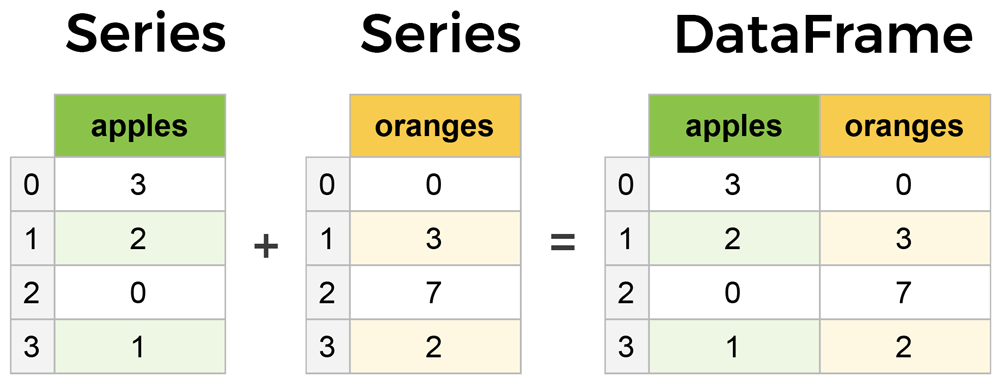

In [54]:
## sample graphic
image = Image(filename='C:\\Users\\user\\Downloads\\series-and-dataframe.width-1200.png')
image

## source
## https://www.google.com/url?sa=i&url=https%3A%2F%2Fpetruknisme.com%2F2019%2F04%2F15%2Fpengenalan-pandas-dan-series%2F&psig=AOvVaw17wt7OZ4YhIZh31n3EeLXY&ust=1686683190194000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCIihwNW2vv8CFQAAAAAdAAAAABAR

### Graphic Explanation

###
###
###

## Task 4.

##### You are given two random variables X and Y.
##### E(X) = 0.5, Var(X) = 2
##### E(Y) = 7, Var(Y) = 3.5
##### cov (X, Y) = -0.8
##### Find the variance of the random variable Z = 2X - 3Y

**Answer**: This is the Var(x) formula: $Var(x)= E(x^2)-(E(x))^2$. And we have $cov(X,Y)$ formula is given as follows

$cov(X,Y)= E(XY)-E(X)E(Y)$

$=========================$

Now, lets calculate $E(X^2)$

$Var(X) = E(X^2)-(E(X))^2$

$2 = E(X^2)-(0.5)^2$

$2.25 = E(X^2)$

$=========================$

Now, lets find $Var(Y)$

$Var(Y)= E(Y^2)-(E(Y))^2$

$(3.5)^2= E(Y^2)-(7^2)$

$49 + 3.5 = E(Y^2)$

$52.5 = E(Y^2)$

$=========================$

Now, lets calculate $cov(X,Y)$

$cov(X,Y)= E(XY)-E(X)E(Y)$

$-0.8 = E(XY) - (0.5)(7)$

$-0.8 = E(XY)-3.5$

$3.5 - 0.8 = E(XY)$

$2.7 = E(XY)$



Now, lets find $Var(Z)$ by using the following formula: 

$Var(Z)=Var(2X-3Y)= E((2X-3Y)^2)-(E(2X-3Y))^2$ 

Lets axpend this part, $E((2X-3Y)^2)$ and rewrite the formula

$Var(Z)= E(4X^2 -12XY +9Y^2)-(2E(X)-3E(Y))^2$ this is equal to following after using linearity property

$Var(Z)= 4E(X^2)-12E(XY)+9E(Y^2) - (2E(X)-3E(Y))^2$, now it is time to plug them in to get the value of $Var(Z)$

$Var(Z)= 4(2.25)-12(2.7)+9(52.5) - (2(0.5) - 21)^2 $

$Var(Z)= 9 - 32.4 + 472.5 - 400$



$Var(Z)= 49.1$


###
###
###

## Task 5.

<div style="text-align: justify">

Omer trained a linear regression model and tested its performance on a test sample of 500
objects. On 400 of those, the model returned a prediction higher than expected by 0.5, and on
the remaining 100, the model returned a prediction lower than expected by 0.7.
What is the MSE for his model?
Limor claims that the linear regression model wasn't trained correctly, and we can do improve
it by changing all the answers by a constant value. What will be her MSE?
You can assume that Limor found the smallest error under her constraints.
Return two values - Omer's and Limor's MSE.

Answer

a) What is the MSE for his model?

 $$\frac{400*0.5^2 +100*  0.7^2}{500} =.298$$


b) Limor claims that the linear regression model wasn't trained correctly, and we can do improve it by changing all the answers by a constant value. What will be her MSE?

$$\frac{400*(0.5 - 0.26)^2 + 100* (0.7 +0.26)^2}{500}= .2304$$
